In [ ]:
from google.colab import files
upload=files.upload()

Saving HDFC.csv to HDFC.csv


In [ ]:
#packages Import
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#Data Import
df=pd.read_csv('HDFC.csv')

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2850,2011-06-01,HDFC,EQ,684.05,676.55,692.95,676.55,689.00,689.10,688.38,1204308,8.290230e+13,38210.0,562346.0,0.4669
2851,2011-06-02,HDFC,EQ,689.10,681.05,684.70,676.60,680.25,680.00,680.53,1100046,7.486138e+13,20300.0,637219.0,0.5793
2852,2011-06-03,HDFC,EQ,680.00,678.50,683.05,658.25,659.15,660.05,668.24,2170805,1.450628e+14,33742.0,1435985.0,0.6615
2853,2011-06-06,HDFC,EQ,660.05,659.95,674.10,659.15,671.00,670.65,668.56,2854529,1.908411e+14,38749.0,2007268.0,0.7032
2854,2011-06-07,HDFC,EQ,670.65,668.00,674.65,662.30,667.35,669.20,669.01,1865334,1.247924e+14,35136.0,1207216.0,0.6472


About Dataset:
Date: A date is a particular day of the month.

Open: It is the price at which the financial security opens in the market when trading begins. It may or may not be different from the previous day's closing price. Thus, the price in the beginning of trading sessions is called open price or simply open
.
High: Today's high refers to a security's intraday highest trading price. It is represented by the highest point on a day's stock chart. This can be contrasted with today's low, which is the trading day's intraday low price.

Low: The low is the minimum price of a stock in a period, while high is the maximum value reached by the stock in the same period.

Close: The close is a reference to the end of a trading session in the financial markets when the markets close for the day. The close can also refer to the process of exiting a trade or the final procedure in a financial transaction in which contract documents are signed and recorded.

Adj Close: The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. The closing price is the raw price, which is just the cash value of the last transacted price before the market closes.

Volume: In capital markets, volume, or trading volume, is the amount of a security that was traded during a given period of time. In the context of a single stock trading on a stock exchange, the volume is commonly reported as the number of shares that changed hands during a given day.

In [ ]:
#Data Cleaning
df.isna().sum()


Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
df['Date'].describe()

count           2456
unique          2456
top       2011-06-01
freq               1
Name: Date, dtype: object

In [ ]:
td=df.dropna()

In [ ]:
td.index=pd.to_datetime(td.Date)
td=td['Prev Close']['2011-06-01':'2011-12-01']

In [ ]:
td

Date
2011-06-01    684.05
2011-06-02    689.10
2011-06-03    680.00
2011-06-06    660.05
2011-06-07    670.65
               ...  
2011-11-25    626.10
2011-11-28    613.75
2011-11-29    646.65
2011-11-30    635.65
2011-12-01    641.70
Name: Prev Close, Length: 125, dtype: float64

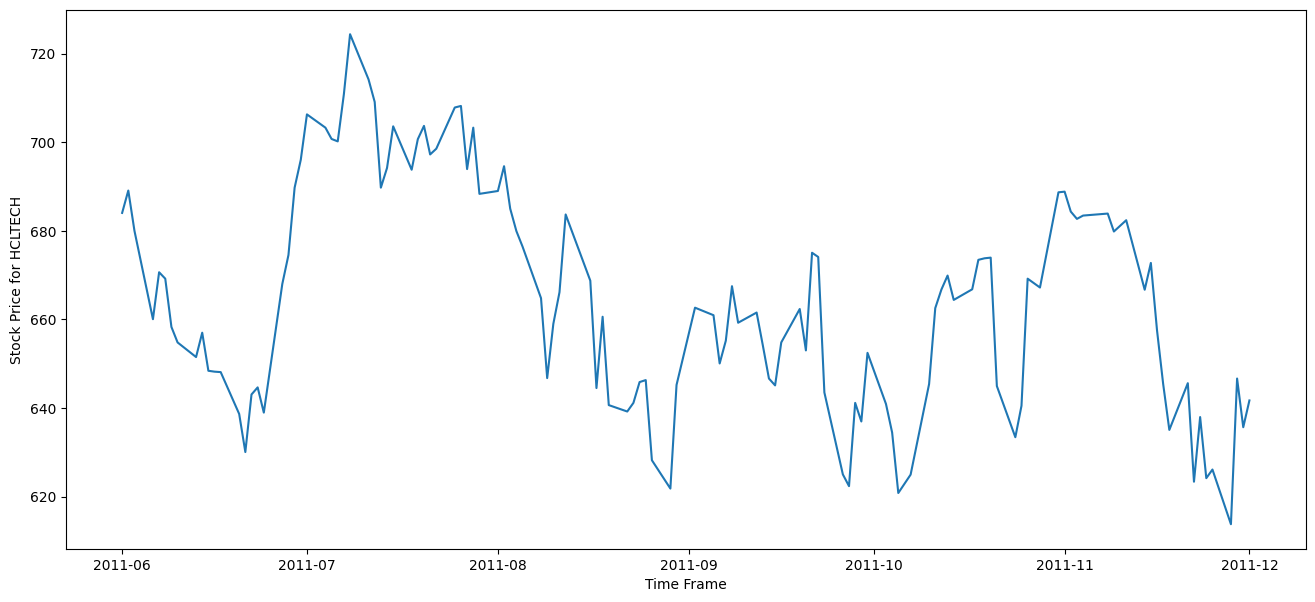

In [ ]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(td)

In [ ]:
# Checking stationarity
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

In [ ]:
rollmean=td.rolling(12).mean()
rollstd=td.rolling(12).std()

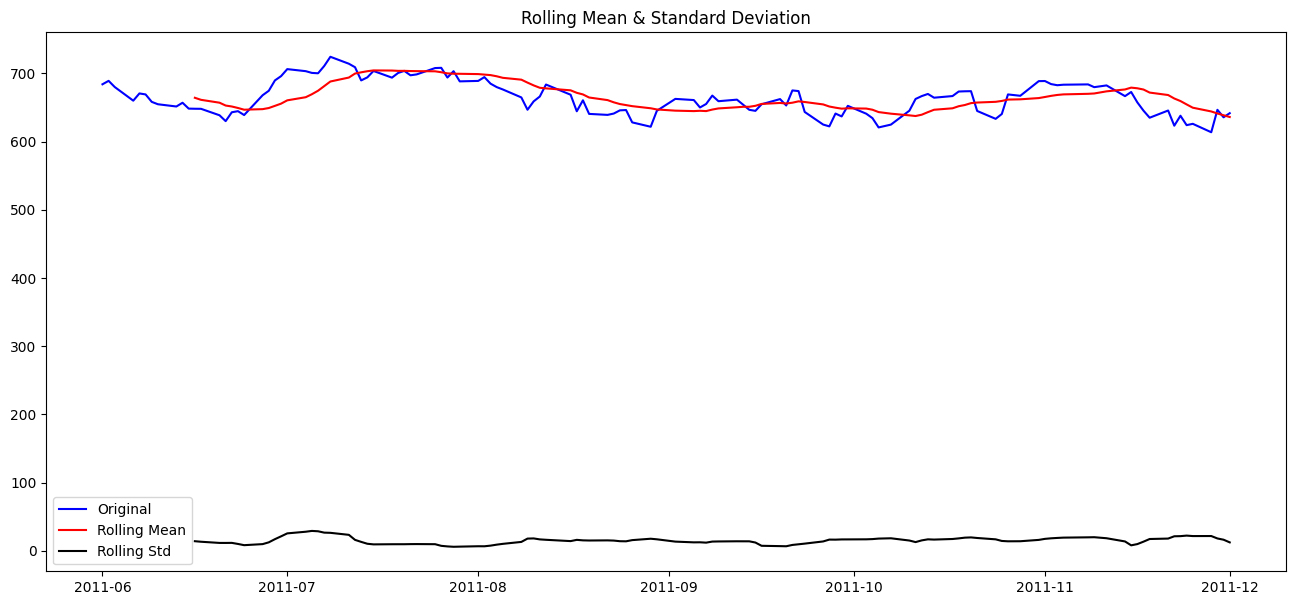

In [ ]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(td, color='blue',label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

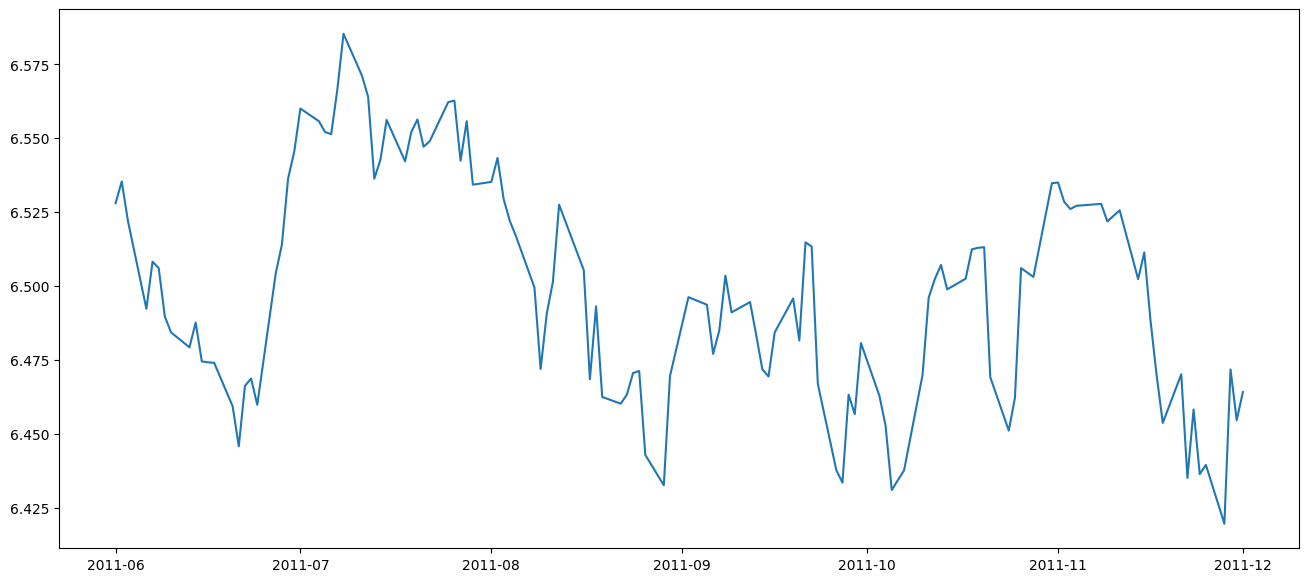

In [ ]:
#making Series Stationary
plt.figure(figsize=(16,7))
fig = plt.figure(1)
import numpy as np
td_log=np.log(td)
plt.plot(td_log)

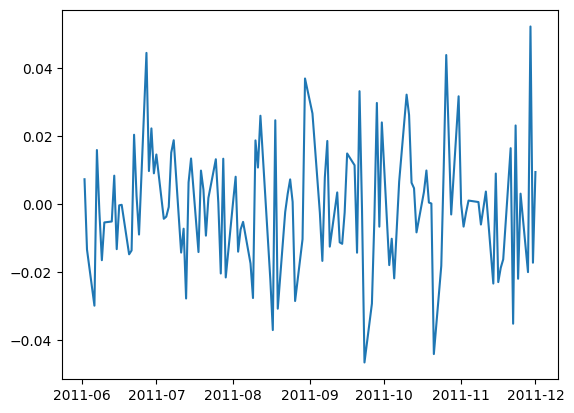

In [ ]:
#Lets try differencing
td_log_diff=td_log-td_log.shift()
plt.plot(td_log_diff)

In [ ]:
#Determing rolling statistics
rollingmean=td_log_diff.rolling(12).mean()
rollingstd=td_log_diff.rolling(12).std()

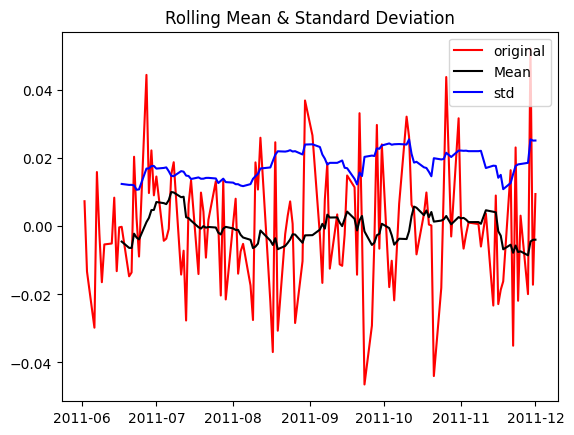

In [ ]:
#Plot rolling statistics:
orig=plt.plot(td_log_diff,color='red',label='original')
mean=plt.plot(rollingmean,color='Black',label='Mean')
std=plt.plot(rollingstd,color='Blue',label='std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
td.sort_index(inplace=True)

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

In [ ]:
lag_acf=acf(td_log_diff,nlags=20)
lag_pcaf=pacf(td_log_diff,nlags=20)

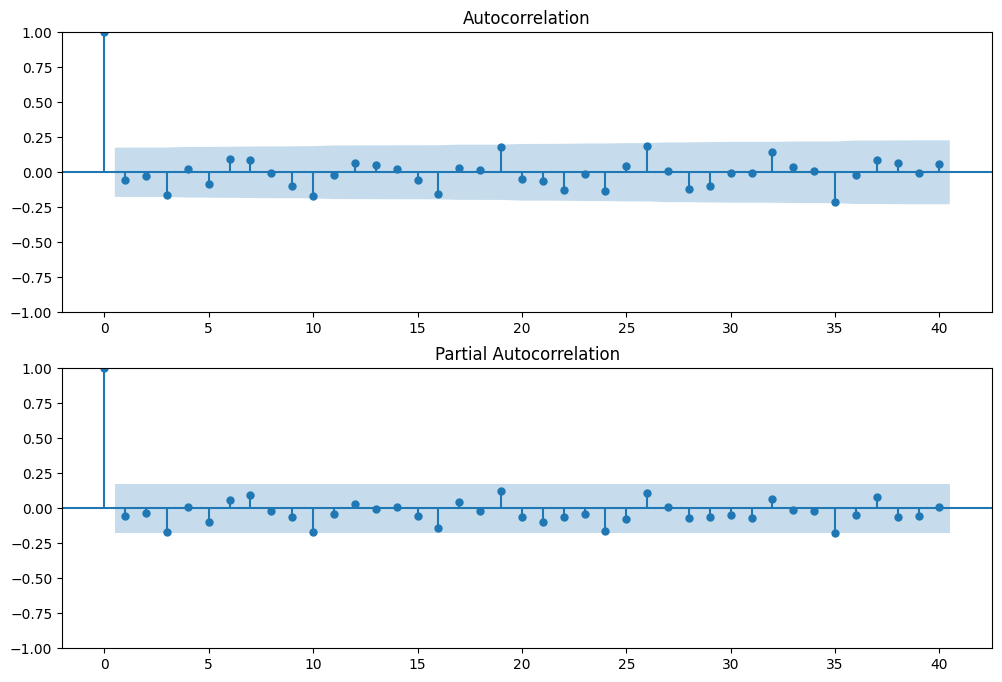

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(td_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(td_log_diff.dropna(),lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


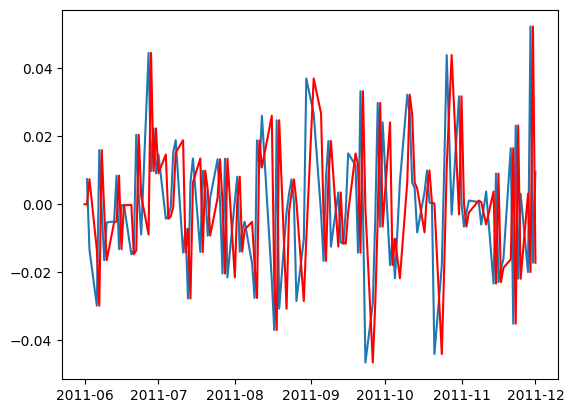

In [ ]:
model=ARIMA(td_log_diff,order=(0,1,0))
model_fit=model.fit()
plt.plot(td_log_diff)
plt.plot(model_fit.fittedvalues, color='red')

In [ ]:
#Taking results back to original scale
ARIMA_diff_predictions = pd.Series(model_fit.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2011-06-01    0.000000
2011-06-02    0.000000
2011-06-03    0.007355
2011-06-06   -0.013294
2011-06-07   -0.029777
dtype: float64


In [ ]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2011-06-01    0.000000
2011-06-02    0.000000
2011-06-03    0.007355
2011-06-06   -0.005938
2011-06-07   -0.035715
dtype: float64


In [ ]:
ARIMA_log_predictions=pd.Series(td_log.iloc[0],index=td_log.index)

In [ ]:
ARIMA_log_predictions=ARIMA_log_predictions.add(ARIMA_diff_predictions_cumsum,fill_value=0)

In [ ]:
ARIMA_log_predictions.head()

Date
2011-06-01    6.528031
2011-06-02    6.528031
2011-06-03    6.535386
2011-06-06    6.522093
2011-06-07    6.492316
dtype: float64

In [ ]:
prediction_ARIMA=np.exp(ARIMA_log_predictions)

Text(0.5, 1.0, 'RMSE: 11.9709')

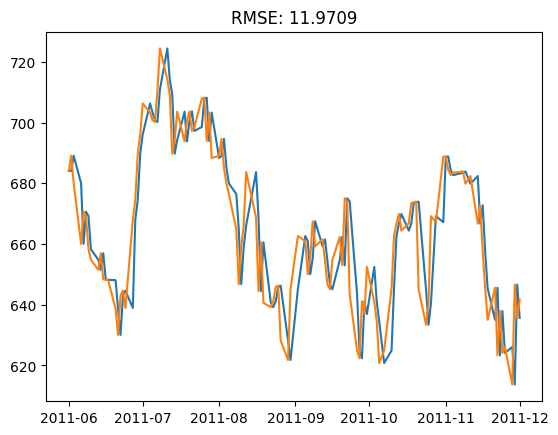

In [ ]:
plt.plot(prediction_ARIMA)
plt.plot(td)
plt.title('RMSE: %.4f'% np.sqrt(sum((prediction_ARIMA-td)**2)/len(td)))

In [ ]:
model_fit.predict(100,110)

Date
2011-10-25   -0.018071
2011-10-26    0.011147
2011-10-28    0.043834
2011-10-31   -0.002993
2011-11-01    0.031716
2011-11-02    0.000218
2011-11-03   -0.006554
2011-11-04   -0.002414
2011-11-08    0.001098
2011-11-09    0.000658
2011-11-11   -0.005940
Name: predicted_mean, dtype: float64

In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=3,
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [ ]:
arimamodel(td_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-634.182, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-636.089, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-634.449, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-634.481, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-637.991, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-632.463, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.850 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)